### 1-Importing the libraries:

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score


### 2-Importing the data:

In [35]:
data = pd.read_csv('KosteckiDillon.csv')

In [6]:
data.head()

,Unnamed: 0,id,time,dos,hatype,age,airq,medication,headache,sex
0,1,1,-11,753,Aura,30,9.0,continuing,yes,female
1,2,1,-10,754,Aura,30,7.0,continuing,yes,female
2,3,1,-9,755,Aura,30,10.0,continuing,yes,female
3,4,1,-8,756,Aura,30,13.0,continuing,yes,female
4,5,1,-7,757,Aura,30,18.0,continuing,yes,female


In [13]:
data.shape

(4152, 10)

In [17]:
data['medication'].value_counts()

continuing    2386
reduced        981
none           785
Name: medication, dtype: int64

In [14]:
data['sex'].value_counts()

female    3545
male       607
Name: sex, dtype: int64

In [7]:
data['headache'].value_counts()

yes    2666
no     1486
Name: headache, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4152 non-null   int64  
 1   id          4152 non-null   int64  
 2   time        4152 non-null   int64  
 3   dos         4152 non-null   int64  
 4   hatype      4152 non-null   object 
 5   age         4152 non-null   int64  
 6   airq        4152 non-null   float64
 7   medication  4152 non-null   object 
 8   headache    4152 non-null   object 
 9   sex         4152 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 324.5+ KB


In [19]:
data.describe()

,Unnamed: 0,id,time,dos,age,airq
count,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000
mean,2076.500000,66.386802,15.455684,646.705925,42.363921,24.826012
std,1198.723488,39.121812,21.737211,335.770123,11.201244,9.514274
min,1.000000,1.000000,-29.000000,98.000000,18.000000,3.000000
25%,1038.750000,33.000000,3.000000,384.000000,33.000000,18.000000
50%,2076.500000,67.000000,12.000000,623.000000,44.000000,24.000000
75%,3114.250000,100.000000,24.000000,950.000000,50.000000,29.000000
max,4152.000000,133.000000,99.000000,1239.000000,66.000000,73.000000


### 3- Checking for Null values:

In [10]:
data.isna().sum()

Unnamed: 0    0
id            0
time          0
dos           0
hatype        0
age           0
airq          0
medication    0
headache      0
sex           0
dtype: int64

### 4- Dropping unnecessary columns:

In [36]:
data = data.drop(['Unnamed: 0','id', 'dos'], axis=1)
data.head()

,time,hatype,age,airq,medication,headache,sex
0,-11,Aura,30,9.0,continuing,yes,female
1,-10,Aura,30,7.0,continuing,yes,female
2,-9,Aura,30,10.0,continuing,yes,female
3,-8,Aura,30,13.0,continuing,yes,female
4,-7,Aura,30,18.0,continuing,yes,female


### 5- EDA:

In [21]:
sns.set()

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

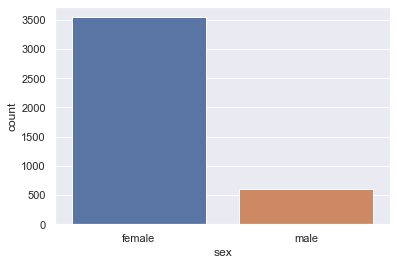

In [22]:
sns.countplot(data['sex'])

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medication', ylabel='count'>

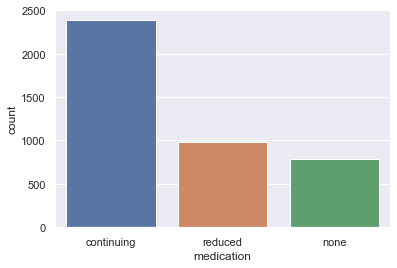

In [23]:
sns.countplot(data['medication'])

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='headache', ylabel='count'>

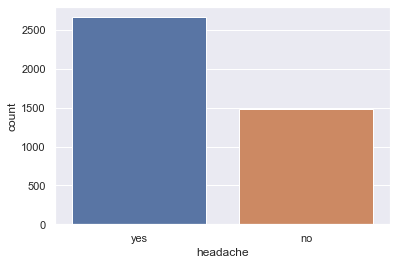

In [25]:
sns.countplot(data['headache'])

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='airq', ylabel='Density'>

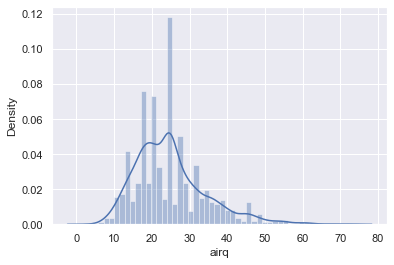

In [28]:
sns.distplot(data['airq'])

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

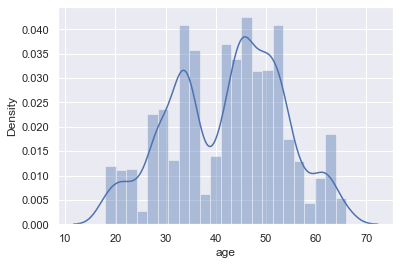

In [29]:
sns.distplot(data['age'])

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time', ylabel='Density'>

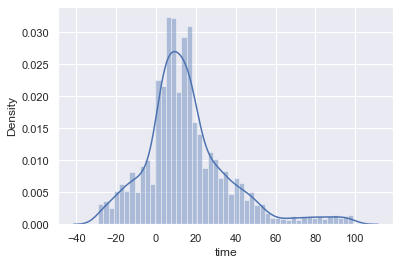

In [30]:
sns.distplot(data['time'])

#### -Looking for Correlations in the data:

In [31]:
correlation = data.corr()

<AxesSubplot:>

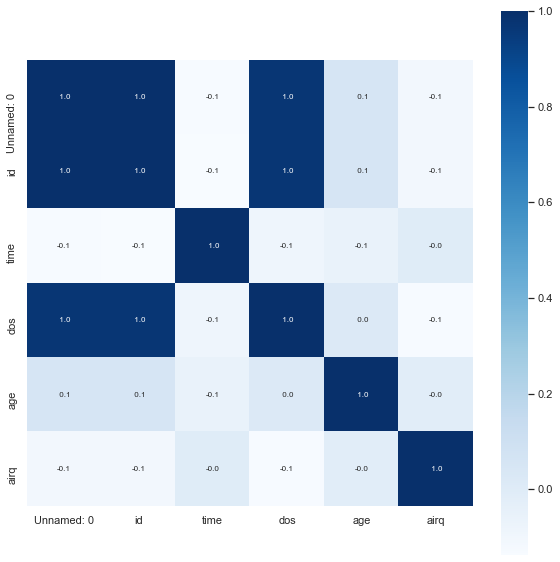

In [37]:
#Plotting the correlation
plt.figure(figsize=(10, 10))

sns.heatmap(correlation, cbar=True, square=True, fmt= ' .1f', annot=True,annot_kws={'size':8}, cmap='Blues')

### 6- Converting text data to numerical:

In [39]:
data.replace({'sex':{'male':0, 'female':1}}, inplace=True)
data.head()

,time,hatype,age,airq,medication,headache,sex
0,-11,Aura,30,9.0,continuing,yes,1
1,-10,Aura,30,7.0,continuing,yes,1
2,-9,Aura,30,10.0,continuing,yes,1
3,-8,Aura,30,13.0,continuing,yes,1
4,-7,Aura,30,18.0,continuing,yes,1


In [40]:
data.replace({'headache':{'no':0, 'yes':1}}, inplace=True)
data.head()

,time,hatype,age,airq,medication,headache,sex
0,-11,Aura,30,9.0,continuing,1,1
1,-10,Aura,30,7.0,continuing,1,1
2,-9,Aura,30,10.0,continuing,1,1
3,-8,Aura,30,13.0,continuing,1,1
4,-7,Aura,30,18.0,continuing,1,1


### Encode Labels

In [59]:
data = pd.get_dummies(data, columns=['medication', 'hatype'])

### 7- Separating dataset into Features and target values:

In [60]:
X = data.drop(columns=['headache'])
y = data['headache']

In [61]:
print(X.shape, y.shape)

(4152, 10) (4152,)


In [62]:
print(X)
print(y)

      time  age  airq  sex  medication_continuing  medication_none  \
0      -11   30   9.0    1                      1                0   
1      -10   30   7.0    1                      1                0   
2       -9   30  10.0    1                      1                0   
3       -8   30  13.0    1                      1                0   
4       -7   30  18.0    1                      1                0   
...    ...  ...   ...  ...                    ...              ...   
4147    44   26  20.0    0                      1                0   
4148    45   26  27.0    0                      1                0   
4149    46   26  28.0    0                      1                0   
4150    47   26  33.0    0                      1                0   
4151    48   26  25.0    0                      1                0   

      medication_reduced  hatype_Aura  hatype_Mixed  hatype_No Aura  
0                      0            1             0               0  
1                  

### 8- Splitting the dataset into training and testing:

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=7)

In [64]:
#Checking dataset size
print(X.shape, X_train.shape, X_test.shape)

(4152, 10) (3321, 10) (831, 10)


### 9- Training the XGBoost model:

In [65]:
data.head()

,time,age,airq,headache,sex,medication_continuing,medication_none,medication_reduced,hatype_Aura,hatype_Mixed,hatype_No Aura
0,-11,30,9.0,1,1,1,0,0,1,0,0
1,-10,30,7.0,1,1,1,0,0,1,0,0
2,-9,30,10.0,1,1,1,0,0,1,0,0
3,-8,30,13.0,1,1,1,0,0,1,0,0
4,-7,30,18.0,1,1,1,0,0,1,0,0


In [68]:
model = XGBClassifier(tree_method="hist",enable_categorical=True)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [69]:
# Producing the predictions
y_pred = model.predict(X_test)

### 10- Getting the accuracy of the model

In [70]:
mae = metrics.mean_absolute_error(y_test, y_pred)

In [71]:
print('Mean Absolute Error is :', mae)

Mean Absolute Error is : 0.2972322503008424


In [73]:
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy Score is :', acc_score)

Accuracy Score is : 0.7027677496991577
